In [1]:
%pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.5 MB/s eta 0:00:00a 0:00:01


In [2]:
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

from glob import glob

In [4]:
#extract path of male and female in crop data and put them in a list
fpath = glob('./crop_data/female/*.jpg')
mpath = glob('./crop_data/male/*.jpg')

In [5]:
df_female = pd.DataFrame(fpath, columns=['filepath'])
df_female['gender'] = 'female'

df_male = pd.DataFrame(mpath, columns=['filepath'])
df_male['gender'] = 'male'

df = pd.concat((df_female, df_male), axis = 0)
df.head()

,filepath,gender
0,./crop_data/female/female_2.jpg,female
1,./crop_data/female/female_3933.jpg,female
2,./crop_data/female/female_4084.jpg,female
3,./crop_data/female/female_98.jpg,female
4,./crop_data/female/female_1842.jpg,female


In [6]:
df.tail()

,filepath,gender
2867,./crop_data/male/male_1156.jpg,male
2868,./crop_data/male/male_1142.jpg,male
2869,./crop_data/male/male_622.jpg,male
2870,./crop_data/male/male_4984.jpg,male
2871,./crop_data/male/male_3033.jpg,male


In [7]:
df.shape

(6117, 2)

In [8]:
# will return the img width
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [9]:
df['dimension'] = df['filepath'].apply(get_size) # store dimention of img in this columns

In [10]:
df.head()

,filepath,gender,dimension
0,./crop_data/female/female_2.jpg,female,101
1,./crop_data/female/female_3933.jpg,female,131
2,./crop_data/female/female_4084.jpg,female,176
3,./crop_data/female/female_98.jpg,female,226
4,./crop_data/female/female_1842.jpg,female,58


In [11]:
dist_gender = df['gender'].value_counts()
dist_gender

gender
female    3245
male      2872
Name: count, dtype: int64

<Axes: ylabel='count'>

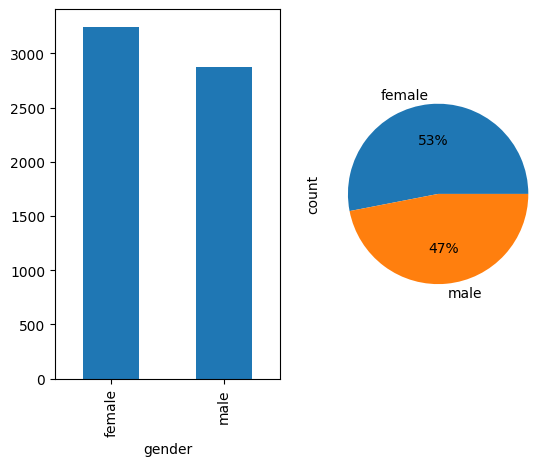

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
dist_gender.plot(kind = 'bar', ax=ax[0])
dist_gender.plot(kind = 'pie', ax=ax[1], autopct = '%0.0f%%')

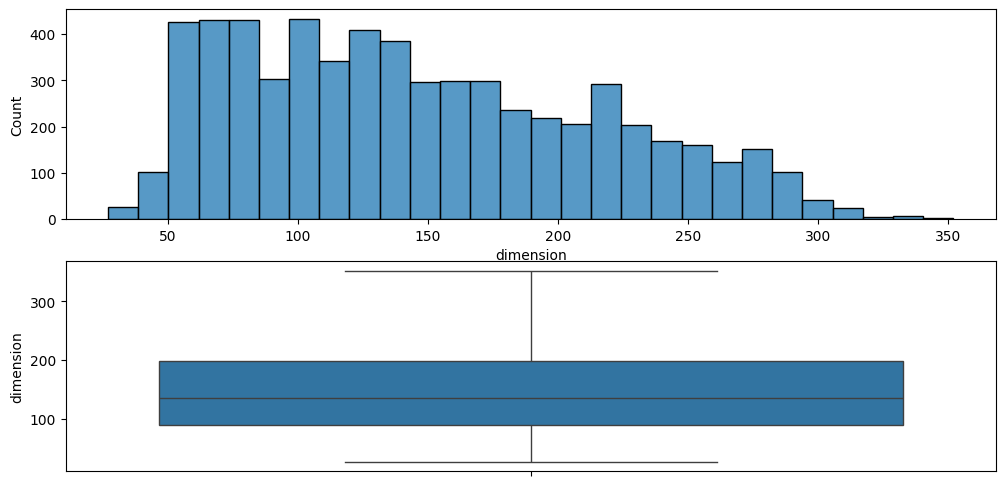

In [20]:
#the distribute of all img
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.histplot(df['dimension'])
plt.subplot(2,1,2)
sns.boxplot(df['dimension'])
plt.show()

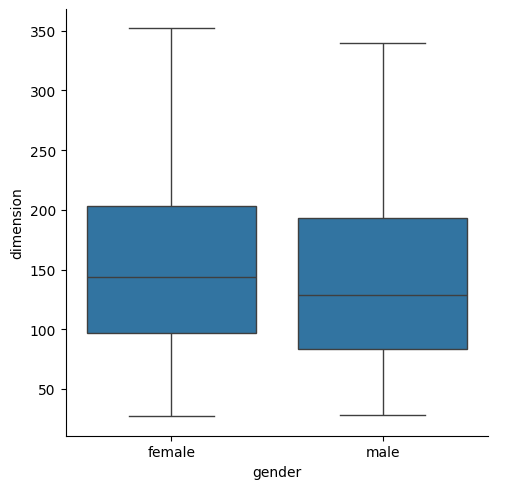

In [21]:
sns.catplot(data=df, x='gender', y='dimension', kind='box')

In [ ]:
# we have almost equal distribution of genders
#2. most image are having dimension more than 60
# female most of the female images are HD compare to male images

# resize the size of img to 100*100

In [23]:
df_filter = df.query('dimension > 60')


In [24]:
df_filter.shape

(5609, 3)

In [25]:
dist_gender = df['gender'].value_counts(normalize=True)
dist_gender

gender
female    0.530489
male      0.469511
Name: proportion, dtype: float64

In [27]:
def structuring(path):
    try:
        img = cv2.imread(path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        size = gray.shape[0]
        if size >=100:
            gray_resize = cv2.resize(gray,(100,100), cv2.INTER_AREA) #shink
        else:
            gray_resize = cv2.resize(gray,(100,100), cv2.INTER_CUBIC) #zoom
            
        flatten_image = gray_resize.flatten()
        return flatten_image    
    except:
        return None
        
    

In [28]:
df_filter['data'] = df_filter['filepath'].apply(structuring) # convert all img into 100*100

/var/folders/x0/15_67n71517908xgbzwr5l3m0000gn/T/ipykernel_78777/3680537037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['data'] = df_filter['filepath'].apply(structuring) # convert all img into 100*100


In [29]:
df_filter.head()

,filepath,gender,dimension,data
0,./crop_data/female/female_2.jpg,female,101,"[28, 27, 35, 36, 37, 12, 48, 84, 69, 86, 206, ..."
1,./crop_data/female/female_3933.jpg,female,131,"[166, 135, 109, 95, 83, 76, 68, 71, 71, 66, 62..."
2,./crop_data/female/female_4084.jpg,female,176,"[38, 37, 23, 26, 38, 29, 50, 57, 57, 49, 38, 4..."
3,./crop_data/female/female_98.jpg,female,226,"[95, 93, 91, 92, 101, 95, 70, 85, 94, 123, 103..."
5,./crop_data/female/female_2393.jpg,female,205,"[36, 52, 38, 48, 51, 59, 63, 42, 44, 52, 44, 4..."


In [31]:
data = df_filter['data'].apply(pd.Series)

In [35]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,28,27,35,36,37,12,48,84,69,86,...,42,11,25,41,35,42,54,52,56,95
1,166,135,109,95,83,76,68,71,71,66,...,131,131,130,133,138,134,133,122,121,138
2,38,37,23,26,38,29,50,57,57,49,...,143,142,142,143,143,141,143,143,142,143
3,95,93,91,92,101,95,70,85,94,123,...,151,101,47,67,78,86,69,84,167,145
5,36,52,38,48,51,59,63,42,44,52,...,123,216,248,250,252,253,254,255,255,255


In [36]:
data.columns = [f'pixel_{i}' for i in data.columns]

In [37]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,28,27,35,36,37,12,48,84,69,86,...,42,11,25,41,35,42,54,52,56,95
1,166,135,109,95,83,76,68,71,71,66,...,131,131,130,133,138,134,133,122,121,138
2,38,37,23,26,38,29,50,57,57,49,...,143,142,142,143,143,141,143,143,142,143
3,95,93,91,92,101,95,70,85,94,123,...,151,101,47,67,78,86,69,84,167,145
5,36,52,38,48,51,59,63,42,44,52,...,123,216,248,250,252,253,254,255,255,255


In [38]:
# Data normalization

data = data/255.0

In [40]:
data['gender'] = df_filter['gender']

In [41]:
data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.109804,0.105882,0.137255,0.141176,0.145098,0.047059,0.188235,0.329412,0.270588,0.337255,...,0.043137,0.098039,0.160784,0.137255,0.164706,0.211765,0.203922,0.219608,0.372549,female
1,0.650980,0.529412,0.427451,0.372549,0.325490,0.298039,0.266667,0.278431,0.278431,0.258824,...,0.513725,0.509804,0.521569,0.541176,0.525490,0.521569,0.478431,0.474510,0.541176,female
2,0.149020,0.145098,0.090196,0.101961,0.149020,0.113725,0.196078,0.223529,0.223529,0.192157,...,0.556863,0.556863,0.560784,0.560784,0.552941,0.560784,0.560784,0.556863,0.560784,female
3,0.372549,0.364706,0.356863,0.360784,0.396078,0.372549,0.274510,0.333333,0.368627,0.482353,...,0.396078,0.184314,0.262745,0.305882,0.337255,0.270588,0.329412,0.654902,0.568627,female
5,0.141176,0.203922,0.149020,0.188235,0.200000,0.231373,0.247059,0.164706,0.172549,0.203922,...,0.847059,0.972549,0.980392,0.988235,0.992157,0.996078,1.000000,1.000000,1.000000,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867,0.603922,0.596078,0.580392,0.541176,0.576471,0.627451,0.650980,0.639216,0.549020,0.290196,...,0.698039,0.701961,0.698039,0.690196,0.686275,0.690196,0.690196,0.690196,0.690196,male
2868,0.309804,0.294118,0.227451,0.125490,0.313725,0.360784,0.309804,0.196078,0.235294,0.266667,...,0.011765,0.011765,0.015686,0.019608,0.023529,0.023529,0.027451,0.027451,0.031373,male
2869,0.431373,0.423529,0.403922,0.388235,0.431373,0.486275,0.564706,0.596078,0.580392,0.513725,...,0.282353,0.274510,0.278431,0.270588,0.270588,0.305882,0.282353,0.243137,0.211765,male
2870,0.392157,0.423529,0.458824,0.494118,0.509804,0.545098,0.560784,0.505882,0.549020,0.545098,...,0.917647,0.917647,0.917647,0.921569,0.913725,0.901961,0.901961,0.909804,0.905882,male


In [ ]:
# remove missing value

In [43]:
data.isnull().sum().sum() # 0 means no missing value

0

In [ ]:
data.dropna(inplace=True)

In [44]:
data.shape

(5609, 10001)

In [ ]:
#save the data for future study

In [45]:
import pickle

In [47]:
pickle.dump(data,open('./data/data_images_100_100.pickle', mode='wb'))